In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import csv

In [2]:
pd.set_option('float_format', '{0:.2f}'.format)

In [3]:
zillow_df = pd.read_csv("OutputData - Total.csv")
zipcode_df = pd.read_csv("Files/manhattan_mod.csv")

In [4]:
zillow_df.columns

Index(['Unnamed: 0', 'address', 'rent', 'sold', 'sold year', 'sqft', 'var',
       'zipcode'],
      dtype='object')

In [5]:
zipcode_df.columns

Index(['Neighborhood', 'zipcode'], dtype='object')

In [6]:
zillow_df = zillow_df.drop(columns='Unnamed: 0', axis=1) # axis 0 for row and axis 1 for column
zillow_df.head()

,address,rent,sold,sold year,sqft,var,zipcode
0,189 E 7th St,nan,3300000.00,2015.00,4200.00,1,10009
1,189 E 7th St,14995.00,4844809.00,2018.00,2183.00,0,10009
2,189 E 7th St,14995.00,nan,nan,nan,2,10009
3,526 E 5th St,23000.00,6100000.00,2018.00,5200.00,0,10009
4,133 Avenue D APT 16,3995.00,nan,nan,nan,2,10009


In [7]:
zillow_df = pd.merge(zillow_df, zipcode_df, on="zipcode", how="outer")

In [8]:
zillow_df.count()

address         23736
rent            23588
sold            13408
sold year       13408
sqft            13408
var             23736
zipcode         23737
Neighborhood    23604
dtype: int64

In [9]:
rent_df = zillow_df.groupby("Neighborhood", as_index=False).median()
rent_df.columns

Index(['Neighborhood', 'rent', 'sold', 'sold year', 'sqft', 'var', 'zipcode'], dtype='object')

In [10]:
rent_df = rent_df.drop(columns=["sold","sold year","var", "sqft", "zipcode"], axis=1)

In [ ]:
rent_df

In [ ]:
zillow_df = zillow_df[zillow_df.loc[:,"sold year"] == 2018]

In [ ]:
zillow_df

In [11]:
zillow_df = zillow_df.dropna(how="any")

In [12]:
zillow_df.count()

address         13197
rent            13197
sold            13197
sold year       13197
sqft            13197
var             13197
zipcode         13197
Neighborhood    13197
dtype: int64

In [13]:
zillow_df = zillow_df.groupby("Neighborhood", as_index=False).median()

In [14]:
sold_df = zillow_df[["Neighborhood","sold", "sqft"]]

In [15]:
sold_df["Avg 20% Downpayment"] = sold_df["sold"]*.2

sold_df["Avg High Closing Cost"] = sold_df["sold"]*.05
sold_df["Avg Property Taxes"] = sold_df["sold"]*.008
avg_property_insurance = 1595

year1 = 15 *12
year2 = 30 *12
interestRate1 = 3.95/100/12
interestRate2 = 4.5/100/12

sold_df["15 Years Monthly Mortgage"] = (sold_df["sold"] * .8) * (interestRate1 * (1 +interestRate1) 
                                                                 ** year1) / ((1+interestRate1) ** year1 - 1)
sold_df["30 Years Monthly Mortgage"] = (sold_df["sold"] * .8) * (interestRate2 * (1 +interestRate2) 
                                                                 ** year2) / ((1+interestRate2) ** year2 - 1)
#Variable is the maintenance cost



C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yuj\anaconda\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [16]:
clean_df = pd.merge(sold_df, rent_df, on="Neighborhood", how="outer")

In [ ]:
clean_df

In [17]:
clean_df["Annual Cap Rate"] = ((clean_df["rent"]*12-clean_df["Avg Property Taxes"])/
                               (clean_df["sold"]+clean_df["Avg High Closing Cost"]))*100
clean_df["Cash on Cash Return"] = (((clean_df["rent"]-clean_df["30 Years Monthly Mortgage"])*12)/
(clean_df["Avg 20% Downpayment"]+clean_df["Avg High Closing Cost"]))*100


In [ ]:
clean_df

In [ ]:
clean_df

In [ ]:
clean_df

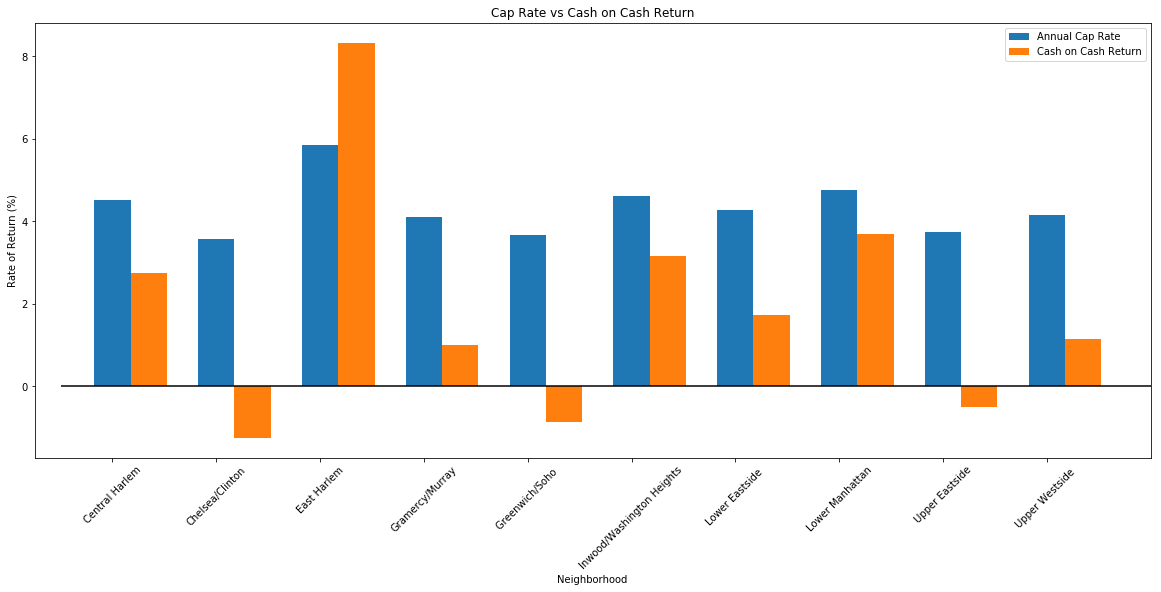

In [18]:
x_axis = np.arange(len(clean_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,8))

bar_width = 0.35

plt.bar(x_axis, clean_df['Annual Cap Rate'], bar_width, label="Annual Cap Rate")

plt.bar(x_axis+bar_width, clean_df['Cash on Cash Return'], bar_width, label="Cash on Cash Return")

plt.xticks(tick_locations, clean_df['Neighborhood'], rotation="45")
plt.xlim(-0.75, len(x_axis))

plt.hlines(y = 0, xmin = -0.5, xmax = 10)

plt.title("Cap Rate vs Cash on Cash Return")
plt.xlabel("Neighborhood")
plt.ylabel(f"Rate of Return (%)")

plt.legend()

plt.savefig('CapRate_CoCReturn_All.png')
plt.show()

In [ ]:
clean_df.to_csv("RentvsMortgage.csv")

In [ ]:
x_axis = np.arange(len(clean_df['Neighborhood']))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,5))

bar_width = 0.25

plt.bar(x_axis, clean_df['rent'], bar_width, color="black", label="Rent")
plt.bar(x_axis+bar_width, clean_df['15 Years Monthly Mortgage'], bar_width, color="blue", label="15 Years Monthly Mortgage")
plt.bar(x_axis+bar_width, clean_df['Avg 20% Downpayment']/year1, bar_width, color="brown",
        bottom=clean_df['15 Years Monthly Mortgage'], label="Avg 20% Downpayment over 15 Years")
plt.bar(x_axis+bar_width, clean_df['Avg Property Taxes'], bar_width, color="green",
        bottom=clean_df['Avg 20% Downpayment']/year1+clean_df['15 Years Monthly Mortgage'], label="Avg Property Taxes")

plt.bar(x_axis+bar_width*2, clean_df['30 Years Monthly Mortgage'], bar_width, color="red", label="30 Years Monthly Mortgage")
plt.bar(x_axis+bar_width*2, clean_df['Avg 20% Downpayment']/year2, bar_width, color="brown",
        bottom=clean_df['30 Years Monthly Mortgage'], label="Avg 20% Downpayment over 30 Years")
plt.bar(x_axis+bar_width*2, clean_df['Avg Property Taxes'], bar_width, color="green",
        bottom=clean_df['Avg 20% Downpayment']/year2+clean_df['30 Years Monthly Mortgage'])

plt.xticks(tick_locations, clean_df['Neighborhood'], rotation="vertical")
plt.xlim(-0.75, len(x_axis))

plt.title("Rent vs Purchase")
plt.xlabel("Neighborhood")
plt.ylabel(f"Average Monthly cost ($)")

plt.legend()

plt.show()

In [ ]:
clean_df.columns